This notebook does not continue from the previous submitted lab 'Cleaning Numerical Data'

1. Import libraries

In [1]:
import pandas as pd
import numpy as np
import datetime
import warnings

warnings.filterwarnings('ignore')
warnings.filterwarnings("ignore", message="numpy.ufunc size changed")

import matplotlib.pyplot as plt
import seaborn as sns

2. Load csv file

In [2]:
customer_df = pd.read_csv('we_fn_use_c_marketing_customer_value_analysis.csv')
customer_df.head(3)

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize


3. Objective with Target column 'customer_id'

In [4]:
target = customer_df['Customer']
customer_df = customer_df.drop('Customer', axis=1)

4. Seperate columns into categorical and numerical dataframes

In [5]:
numerical_df = customer_df.select_dtypes(include=np.number)
categorical_df = customer_df.select_dtypes(include=np.object_)

5. Plot the categorical variables

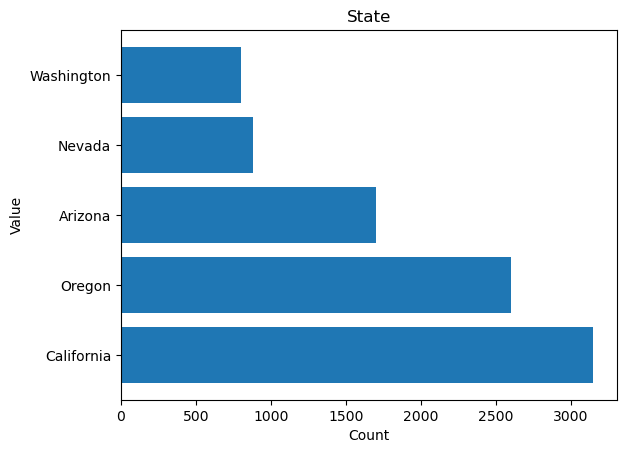

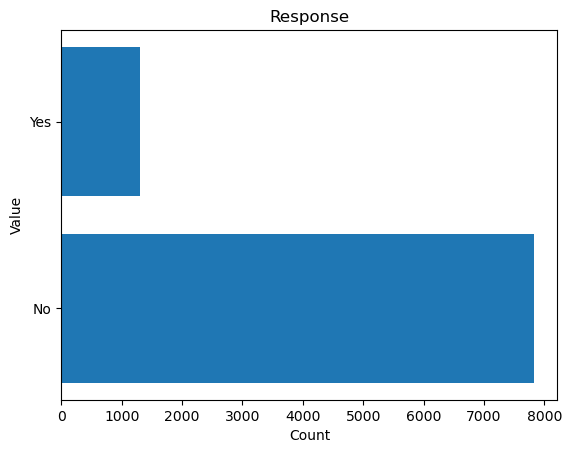

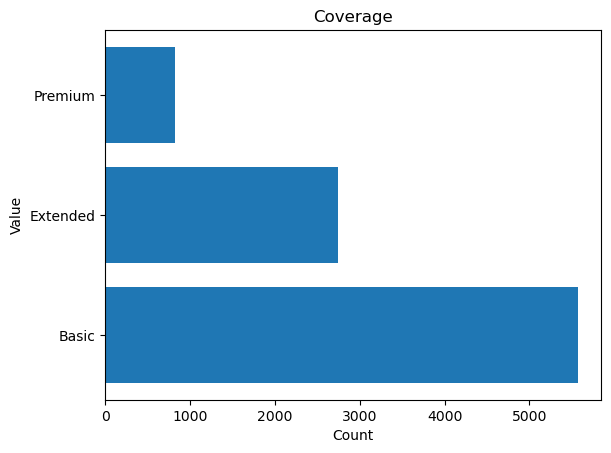

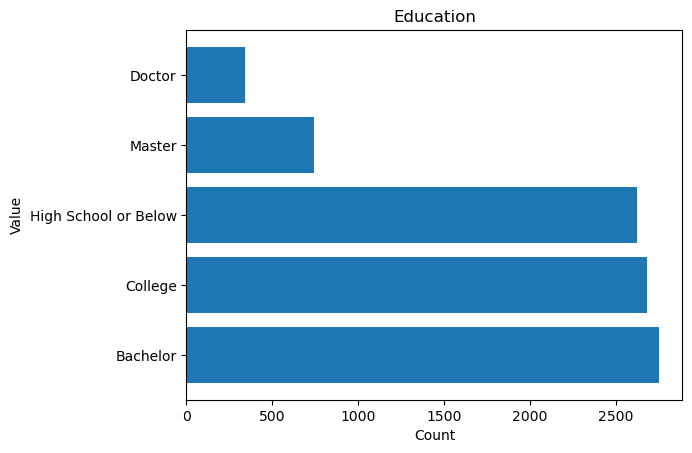

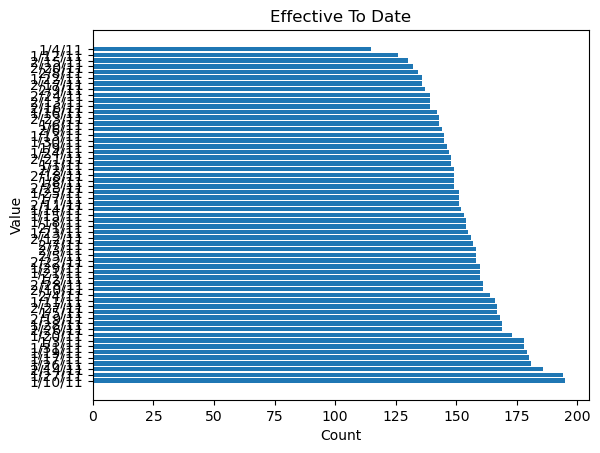

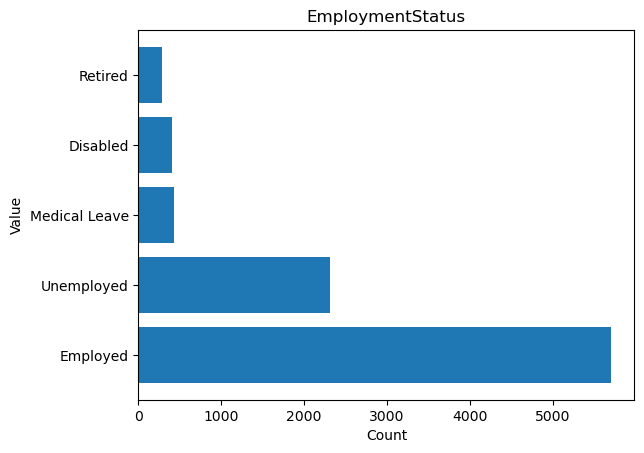

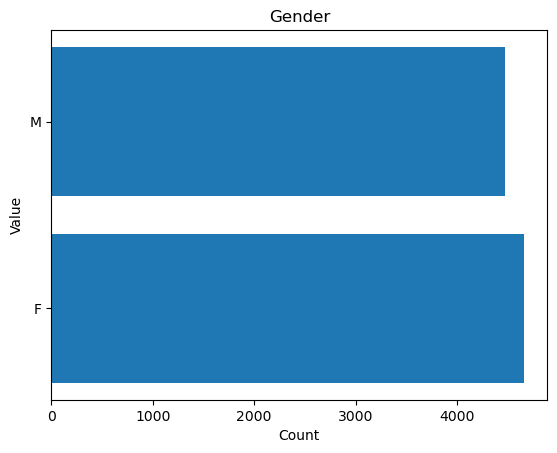

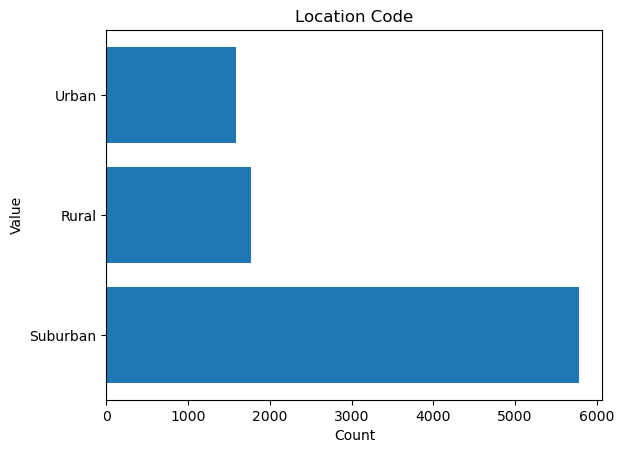

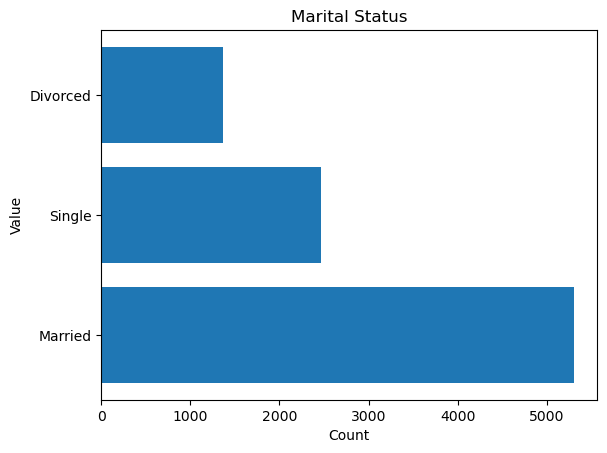

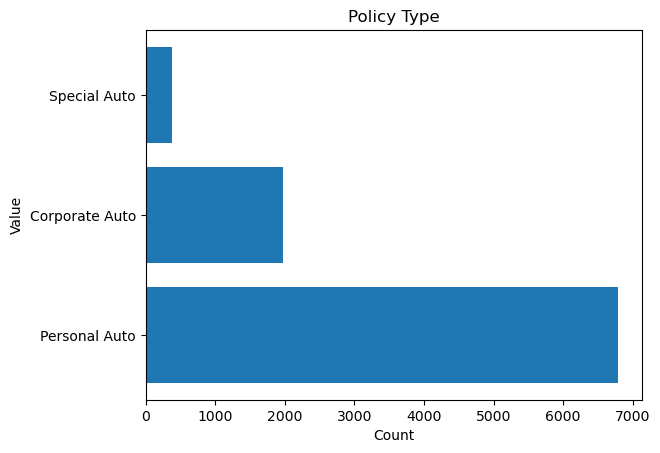

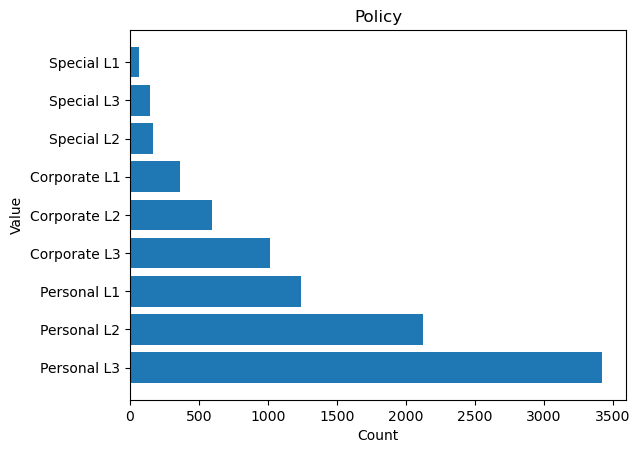

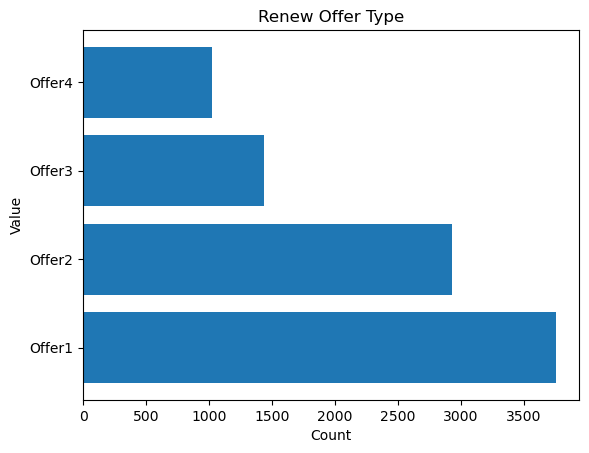

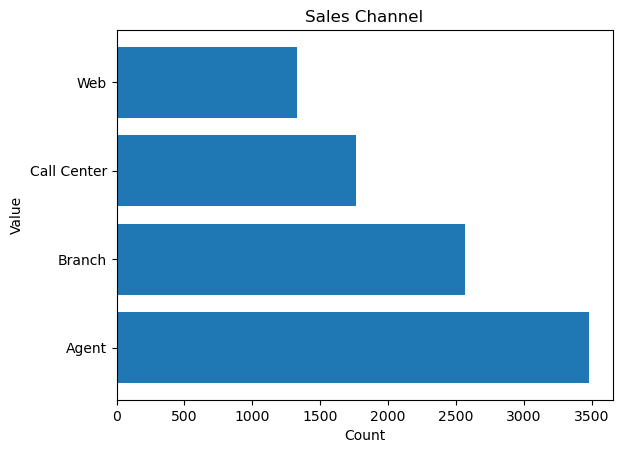

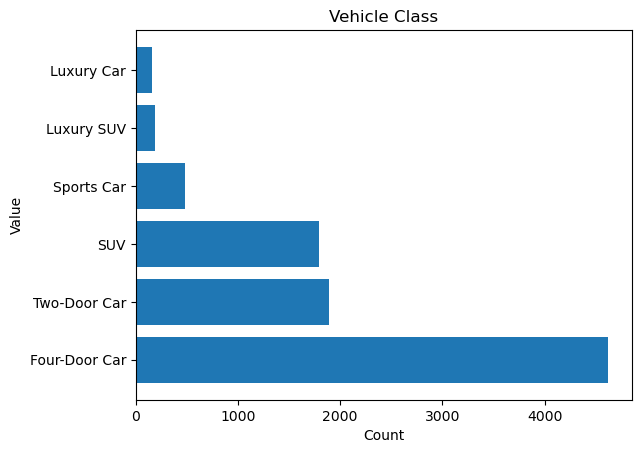

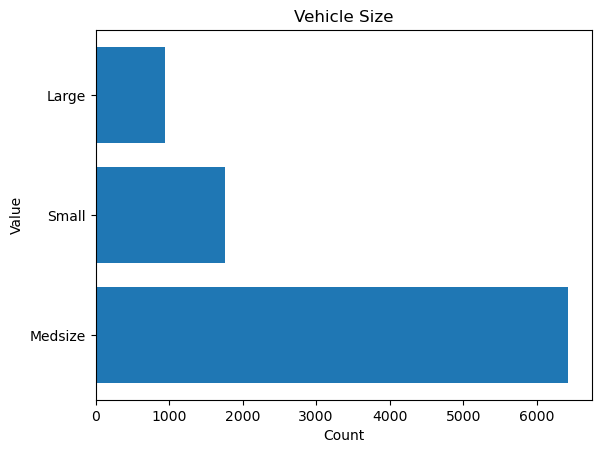

In [7]:
for column in categorical_df:
    values = categorical_df[column].value_counts() #use count function to give values to information data
    plt.figure()
    plt.barh(values.index, values.values) #barh inverts the axis to view the graph on horizontal
    plt.title(column) #sets the title of each graph as the name of the column in df
    plt.xlabel('Count') #sets the default title for x axis
    plt.ylabel('Value') #sets the default title for y axis
    plt.show()

6. Is there any data cleaning needed?

In [27]:
categorical_df.columns

Index(['State', 'Response', 'Coverage', 'Education', 'Effective To Date',
       'EmploymentStatus', 'Gender', 'Location Code', 'Marital Status',
       'Policy Type', 'Policy', 'Renew Offer Type', 'Sales Channel',
       'Vehicle Class', 'Vehicle Size'],
      dtype='object')

In [34]:
for column in categorical_df: #question : is there a better way to segment this? or does it have to be one by one?
    count = categorical_df[column].value_counts()
    print(count)

California    3150
Oregon        2601
Arizona       1703
Nevada         882
Washington     798
Name: State, dtype: int64
No     7826
Yes    1308
Name: Response, dtype: int64
Basic       5568
Extended    2742
Premium      824
Name: Coverage, dtype: int64
Bachelor                2748
College                 2681
High School or Below    2622
Master                   741
Doctor                   342
Name: Education, dtype: int64
1/10/11    195
1/27/11    194
2/14/11    186
1/26/11    181
1/17/11    180
1/19/11    179
1/31/11    178
1/3/11     178
1/20/11    173
2/26/11    169
1/28/11    169
2/19/11    168
1/5/11     167
2/27/11    167
1/11/11    166
2/4/11     164
2/10/11    161
2/28/11    161
1/2/11     160
1/21/11    160
1/29/11    160
2/22/11    158
2/5/11     158
2/3/11     158
2/7/11     157
2/12/11    156
1/23/11    155
2/1/11     154
1/18/11    154
1/15/11    153
1/14/11    152
2/11/11    151
1/7/11     151
1/25/11    151
2/25/11    149
1/8/11     149
2/18/11    149
2/2/11     149
1

In [28]:
categorical_df['State'].value_counts()

California    3150
Oregon        2601
Arizona       1703
Nevada         882
Washington     798
Name: State, dtype: int64

- we can group Nevada and Washington as 'Other' category

In [29]:
categorical_df['Response'].value_counts()

No     7826
Yes    1308
Name: Response, dtype: int64

In [30]:
categorical_df['Coverage'].value_counts()

Basic       5568
Extended    2742
Premium      824
Name: Coverage, dtype: int64

In [35]:
categorical_df['Education'].value_counts()

Bachelor                2748
College                 2681
High School or Below    2622
Master                   741
Doctor                   342
Name: Education, dtype: int64

- group Master and Doctor as 'Higher Degree'

In [36]:
categorical_df['Effective To Date'].value_counts()

1/10/11    195
1/27/11    194
2/14/11    186
1/26/11    181
1/17/11    180
1/19/11    179
1/31/11    178
1/3/11     178
1/20/11    173
2/26/11    169
1/28/11    169
2/19/11    168
1/5/11     167
2/27/11    167
1/11/11    166
2/4/11     164
2/10/11    161
2/28/11    161
1/2/11     160
1/21/11    160
1/29/11    160
2/22/11    158
2/5/11     158
2/3/11     158
2/7/11     157
2/12/11    156
1/23/11    155
2/1/11     154
1/18/11    154
1/15/11    153
1/14/11    152
2/11/11    151
1/7/11     151
1/25/11    151
2/25/11    149
1/8/11     149
2/18/11    149
2/2/11     149
1/1/11     148
2/21/11    148
1/24/11    147
1/9/11     146
1/30/11    145
1/13/11    145
2/6/11     144
1/6/11     143
2/23/11    143
1/16/11    142
2/16/11    139
2/13/11    139
2/24/11    139
2/9/11     137
2/17/11    136
1/22/11    136
2/8/11     134
2/20/11    132
2/15/11    130
1/12/11    126
1/4/11     115
Name: Effective To Date, dtype: int64

- group by month?

In [37]:
categorical_df['EmploymentStatus'].value_counts()

Employed         5698
Unemployed       2317
Medical Leave     432
Disabled          405
Retired           282
Name: EmploymentStatus, dtype: int64

- some might have a meaningful value or represent an important difference (not the same to be retired and or on medical leave)

In [38]:
categorical_df['Gender'].value_counts()

F    4658
M    4476
Name: Gender, dtype: int64

In [39]:
categorical_df['Location Code'].value_counts()

Suburban    5779
Rural       1773
Urban       1582
Name: Location Code, dtype: int64

In [40]:
categorical_df['Marital Status'].value_counts()

Married     5298
Single      2467
Divorced    1369
Name: Marital Status, dtype: int64

In [41]:
categorical_df['Policy Type'].value_counts()

Personal Auto     6788
Corporate Auto    1968
Special Auto       378
Name: Policy Type, dtype: int64

In [42]:
categorical_df['Policy'].value_counts()

Personal L3     3426
Personal L2     2122
Personal L1     1240
Corporate L3    1014
Corporate L2     595
Corporate L1     359
Special L2       164
Special L3       148
Special L1        66
Name: Policy, dtype: int64

- group by Personal, Corporate and Special policies

In [43]:
categorical_df['Renew Offer Type'].value_counts()

Offer1    3752
Offer2    2926
Offer3    1432
Offer4    1024
Name: Renew Offer Type, dtype: int64

In [44]:
categorical_df['Sales Channel'].value_counts()

Agent          3477
Branch         2567
Call Center    1765
Web            1325
Name: Sales Channel, dtype: int64

In [45]:
categorical_df['Vehicle Class'].value_counts()

Four-Door Car    4621
Two-Door Car     1886
SUV              1796
Sports Car        484
Luxury SUV        184
Luxury Car        163
Name: Vehicle Class, dtype: int64

In [46]:
categorical_df['Vehicle Size'].value_counts()

Medsize    6424
Small      1764
Large       946
Name: Vehicle Size, dtype: int64